In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

random_points = 100

# Linear Regression

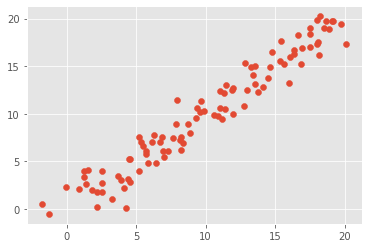

In [2]:
points = np.random.normal(size=[2, random_points]) + np.linspace(0, 20, random_points) # 0-20分100份 完美点
# size=2 x行y行都有误差
x = points[0, :]
y = points[1, :]
plt.scatter(x, y)

In [3]:
A = np.vstack((np.ones(x.shape), x)).T

In [4]:
A.shape

(100, 2)

In [5]:
beta = np.linalg.inv((A.T.dot(A))).dot(A.T).dot(y)

In [6]:
beta # A有几列 beta有几个值 ## intercpet and slope

array([0.26199811, 0.9806483 ])

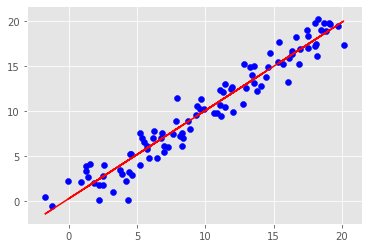

In [7]:
plt.plot(x, A.dot(beta), color="r")
plt.scatter(x,y,color="b")

# Polynomial Regression

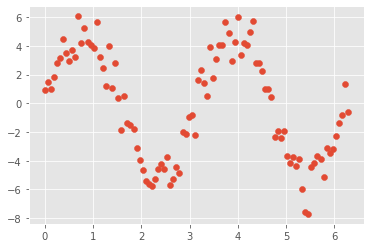

In [8]:
# 产生数据
noise = np.random.normal(size=[random_points]) #误差
x = np.linspace(0, 2 * np.pi, random_points) #正确的值 ## 0-2pi 取100个点
y = 5 * np.sin(2 * x) + noise #正确值(-5~5) 加误差
plt.scatter(x, y)

In [9]:
degree = 8 # m=8 -> col9:x^8
A = list()
for i in range(degree + 1):  # col1:1 col2:x col3:x^2 col4:x^3 ...
    A.append(np.power(x, i)) # np.power: the power of x

A = np.vstack(A).T # x, horizontal values (lists) -> every row of list, overlap vertically -> np.vstack 
                   ## matrix A ought to be col1 全是1 (from slide), now row1 全是1 -> need a transpose
A.shape

(100, 9)

In [10]:
beta = np.linalg.inv((A.T.dot(A))).dot(A.T).dot(y)
beta # is the coefficient of every parameter (ie. coeff of slope, x, x^2, ..., x^m)

array([ 1.39214387e+00, -2.93430623e+00,  3.35408669e+01, -4.57651919e+01,
        2.28394280e+01, -4.98655745e+00,  4.09920653e-01,  6.75902821e-03,
       -1.87522625e-03])

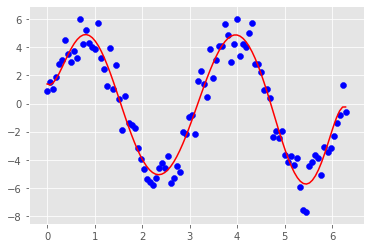

In [11]:
plt.plot(x, A.dot(beta), color = "red") # 8次函数function
plt.scatter(x,y,color="blue")

# Ploynomial vs Ridge vs Lasso vs ElasticNet

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
pd.options.display.float_format = '{:,.2g}'.format

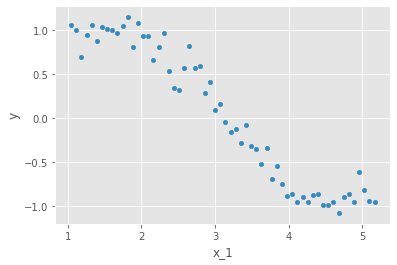

In [13]:
x = np.array([i * np.pi / 180 for i in range(60, 300, 4)]) # generate data
np.random.seed(10)
y = np.sin(x) + np.random.normal(0, 0.15, len(x))
data = pd.DataFrame(np.column_stack([x, y]),columns=['x_1','y'])
data.plot.scatter('x_1','y')

In [14]:
degree = 15
for i in range(degree + 1):
    data[f"x_{i}"] = np.power(x, i)
data.head(2)

,x_1,y,x_0,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1,1.1,1,1.1,1.1,1.2,1.3,1.3,1.4,1.4,1.5,1.6,1.7,1.7,1.8,1.9,2
1,1.1,1,1,1.2,1.4,1.6,1.7,1.9,2.2,2.4,2.7,3,3.4,3.8,4.2,4.7,5.3


### Polynomial Regression

In [15]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    features = [f"x_{i}" for i in range(1, power + 1)]
    
    model = LinearRegression(normalize=True)
    model.fit(data[features], data['y'])
    y_pred = model.predict(data[features])
    
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x_1'], y_pred, color='red')
        plt.scatter(data['x_1'], data['y'])
        plt.title(f"Power of {power}")
    
    lse = np.sum((y_pred - data['y']) ** 2)
    result = [lse]
    result.extend([model.intercept_])
    result.extend(model.coef_)
    return result

In [16]:
col = ["LSE", "intercept"] + [f"coef_x_{i}" for i in range(1, 16)]
ind = [f"model_pow_{i}" for i in range(1, 16)]

coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

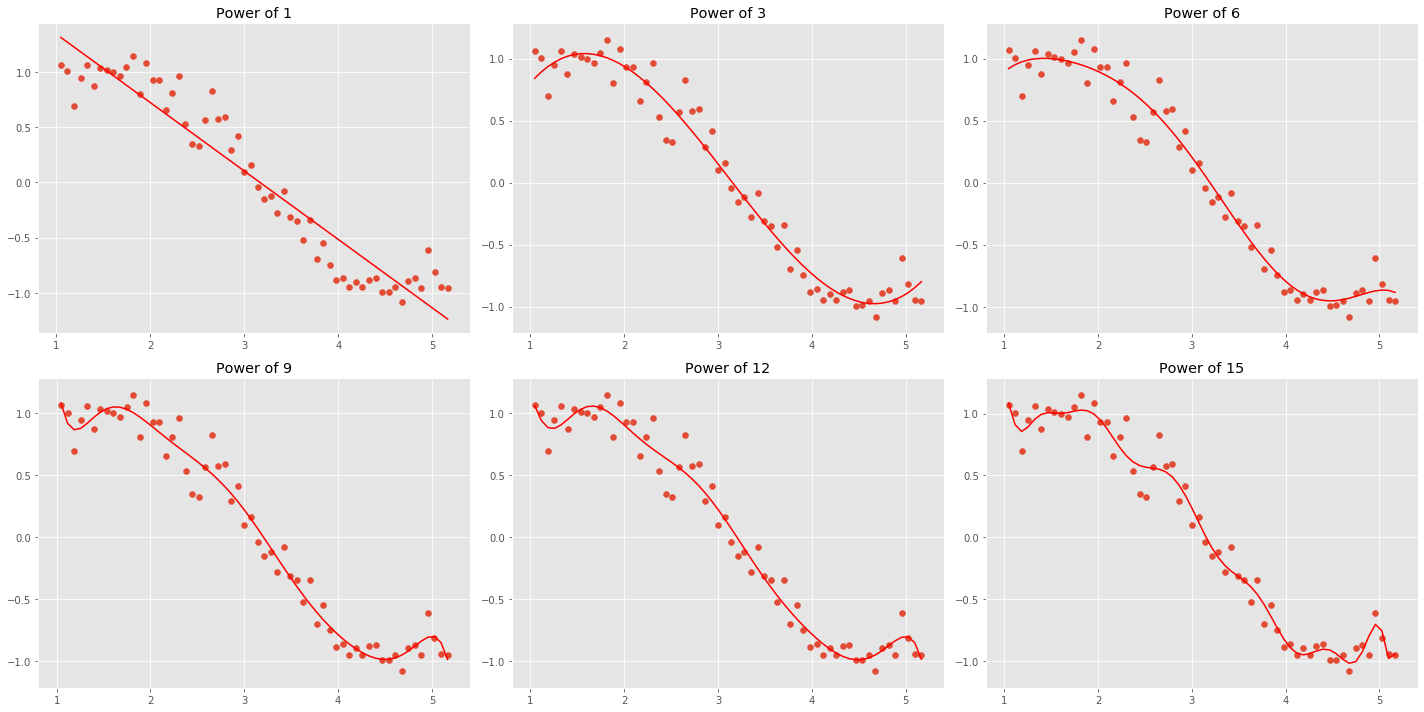

In [17]:
# different powers
plt.figure(figsize=(20, 10))
models_to_plot = {1:231, 3:232, 6:233, 9:234, 12:235, 15:236}
for i in range(1, 16):
    coef_matrix_simple.iloc[i - 1, 0:i + 2] = linear_regression(data, i, models_to_plot)

In [18]:
coef_matrix_simple

,LSE,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


### Ridge Regression

In [19]:
from sklearn.linear_model import Ridge
def ridge_regression(data, features, lambda_, models_to_plot):
    
    model = Ridge(alpha=lambda_, normalize=True)
    model.fit(data[features], data['y'])
    y_pred = model.predict(data[features])
    
    if lambda_ in models_to_plot:
        plt.subplot(models_to_plot[lambda_])
        plt.tight_layout()
        plt.plot(data['x_1'], y_pred, color='red')
        plt.scatter(data['x_1'], data['y'])
        plt.title(f"Lambda of {lambda_}")
    
    lse = np.sum((y_pred - data['y']) ** 2)
    result = [lse]
    result.extend([model.intercept_])
    result.extend(model.coef_)
    return result

In [20]:
features = [f"x_{i}" for i in range(1, 16)]

#Set the different values of lambda to be tested
lambda_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ["LSE", "intercept"] + [f"coef_x_{i}" for i in range(1, 16)]
ind = [f"lambda_{i}" for i in lambda_ridge]

coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

C:\Users\Brian Pan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46852e-17): result may not be accurate.
  overwrite_a=True).T


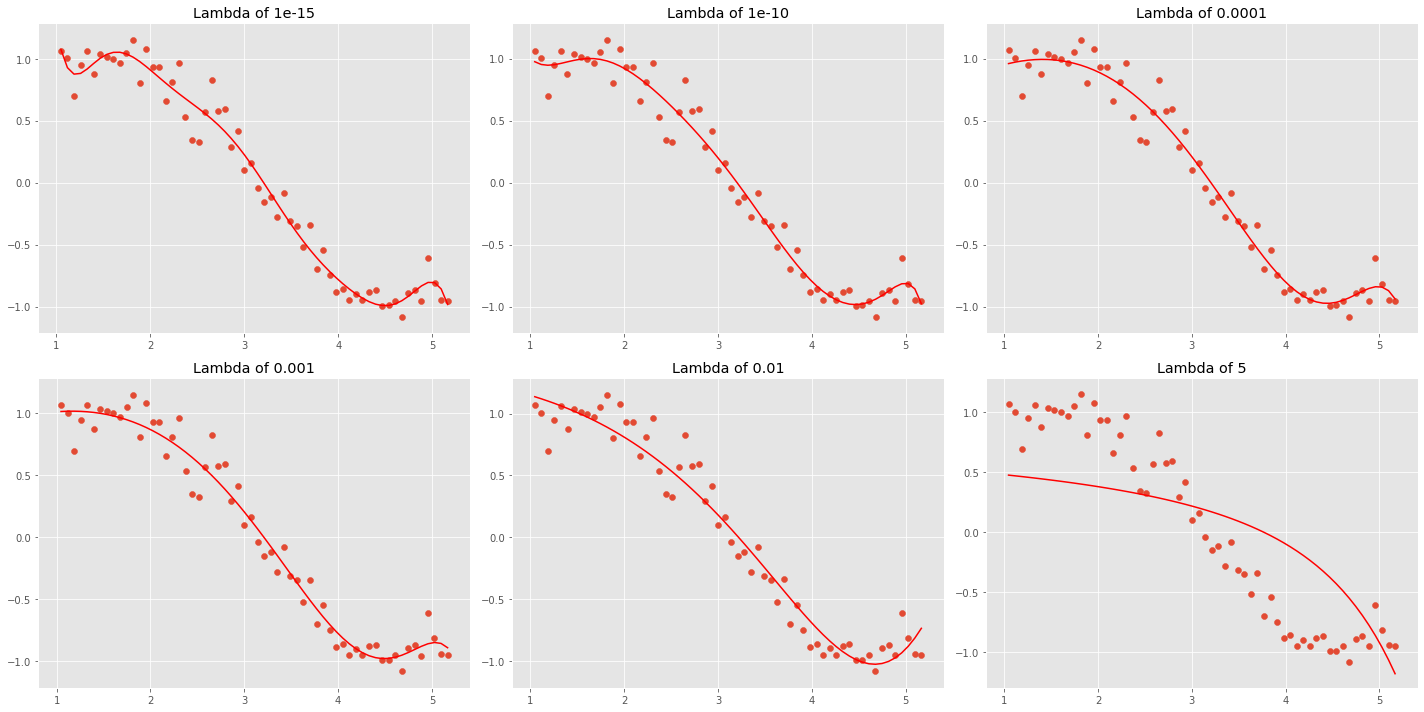

In [21]:
# different lambdas (lambda = 5 tooo much)
plt.figure(figsize=(20, 10))
models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(len(lambda_ridge)):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, features, lambda_ridge[i], models_to_plot)

In [22]:
coef_matrix_ridge

,LSE,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
lambda_1e-15,0.87,94,-3e+02,3.8e+02,-2.3e+02,65,0.54,-4.3,0.39,0.2,-0.028,-0.007,0.0012,0.00019,-5.6e-05,4.1e-06,-7.8e-08
lambda_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
lambda_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
lambda_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
lambda_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
lambda_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
lambda_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
lambda_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
lambda_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
lambda_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


### Lasso Regression

In [23]:
from sklearn.linear_model import Lasso
def lasso_regression(data, features, lambda_, models_to_plot):
    
    model = Lasso(alpha=lambda_, normalize=True, max_iter=1e5)
    model.fit(data[features], data['y'])
    y_pred = model.predict(data[features])
    
    # 看图的（不用关心）
    if lambda_ in models_to_plot:
        plt.subplot(models_to_plot[lambda_])
        plt.tight_layout()
        plt.plot(data['x_1'], y_pred, color='red')
        plt.scatter(data['x_1'], data['y'])
        plt.title(f"Lambda of {lambda_}")
    
    lse = np.sum((y_pred - data['y']) ** 2)
    result = [lse]
    result.extend([model.intercept_])
    result.extend(model.coef_)
    return result

In [24]:
features = [f"x_{i}" for i in range(1, 16)]

#Set the different values of lambda to be tested
lambda_lasso = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10]

#Initialize the dataframe for storing coefficients.
col = ["LSE", "intercept"] + [f"coef_x_{i}" for i in range(1, 16)]
ind = [f"lambda_{i}" for i in lambda_lasso]

coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

C:\Users\Brian Pan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47835738259043836, tolerance: 0.003694803842184409
  positive)
C:\Users\Brian Pan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47828183990577433, tolerance: 0.003694803842184409
  positive)
C:\Users\Brian Pan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.470793301904076, tolerance: 0.003694803842184409
  positive)


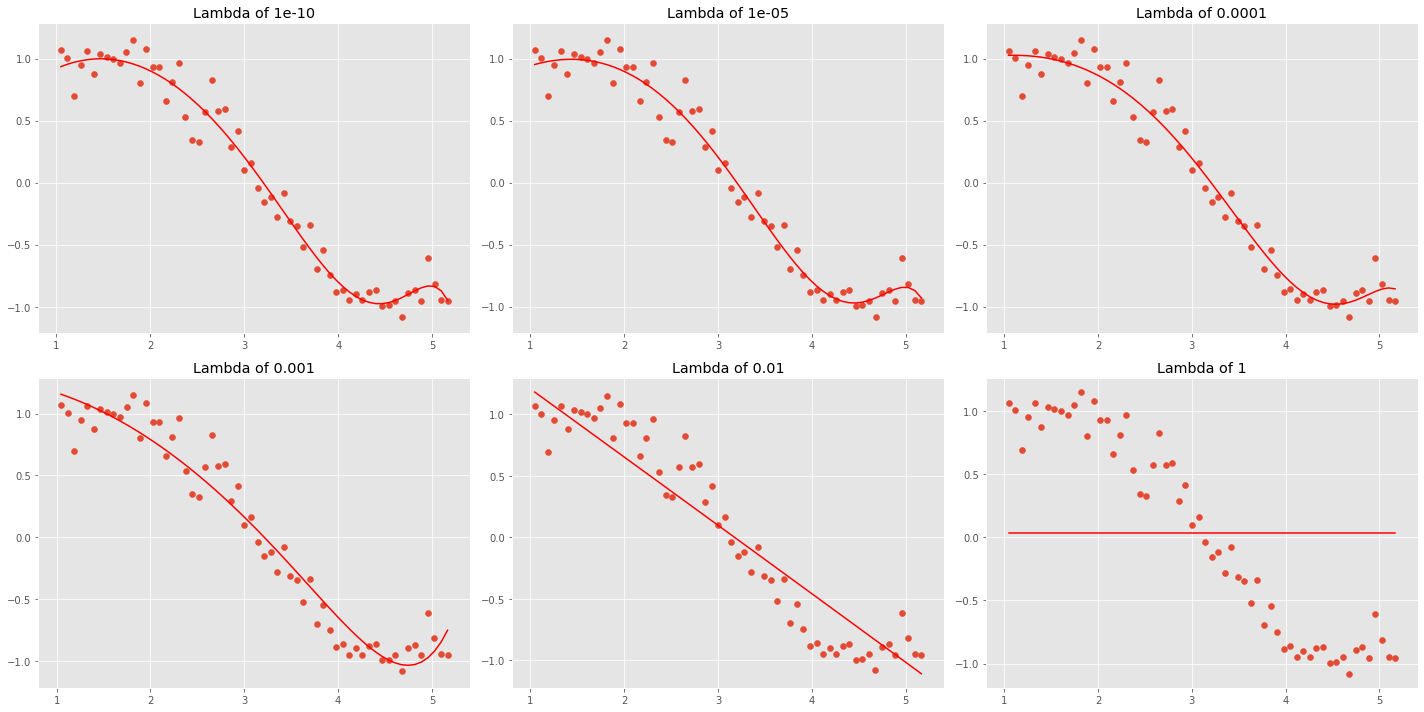

In [25]:
plt.figure(figsize=(20, 10))
models_to_plot = {1e-10:231, 1e-5:232, 1e-4:233, 1e-3:234, 1e-2:235, 1:236}
for i in range(len(lambda_lasso)):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, features, lambda_lasso[i], models_to_plot)

In [26]:
coef_matrix_lasso #希望删除一些feature用lasso

,LSE,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
lambda_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
lambda_1e-10,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
lambda_1e-08,0.96,0.22,1.1,-0.37,0.00077,0.0016,-0.00011,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.3e-09,2e-10,-1.9e-10,-9.3e-11
lambda_1e-05,0.96,0.5,0.6,-0.13,-0.038,-0,0,0,0,7.7e-06,1e-06,7.7e-08,0,0,0,-0,-7e-11
lambda_0.0001,1,0.9,0.17,-0,-0.048,-0,-0,0,0,9.5e-06,5.1e-07,0,0,0,-0,-0,-4.4e-11
lambda_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
lambda_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
lambda_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
lambda_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
lambda_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


### ElasticNet Regression

In [27]:
from sklearn.linear_model import ElasticNet
def elasticnet_regression(data, features, lambda_, models_to_plot):
    
    model = ElasticNet(alpha=lambda_, l1_ratio=0.5, normalize=True) #alpha对应slide lambda, l1ratio对应slide alpha
    model.fit(data[features], data['y'])
    y_pred = model.predict(data[features])
    
    if lambda_ in models_to_plot:
        plt.subplot(models_to_plot[lambda_])
        plt.tight_layout()
        plt.plot(data['x_1'], y_pred, color='red')
        plt.scatter(data['x_1'], data['y'])
        plt.title(f"Lambda of {lambda_}")
    
    lse = np.sum((y_pred - data['y']) ** 2)
    result = [lse]
    result.extend([model.intercept_])
    result.extend(model.coef_)
    return result

In [28]:
features = [f"x_{i}" for i in range(1, 16)]

#Set the different values of lambda to be tested
lambda_elasticnet = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10]

#Initialize the dataframe for storing coefficients.
col = ["LSE", "intercept"] + [f"coef_x_{i}" for i in range(1, 16)]
ind = [f"lambda_{i}" for i in lambda_elasticnet]

coef_matrix_elasticnet = pd.DataFrame(index=ind, columns=col)

C:\Users\Brian Pan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4865033378113965, tolerance: 0.003694803842184409
  positive)
C:\Users\Brian Pan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4865019447480094, tolerance: 0.003694803842184409
  positive)
C:\Users\Brian Pan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.48636419686020627, tolerance: 0.003694803842184409
  positive)
C:\Users\Brian Pan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number

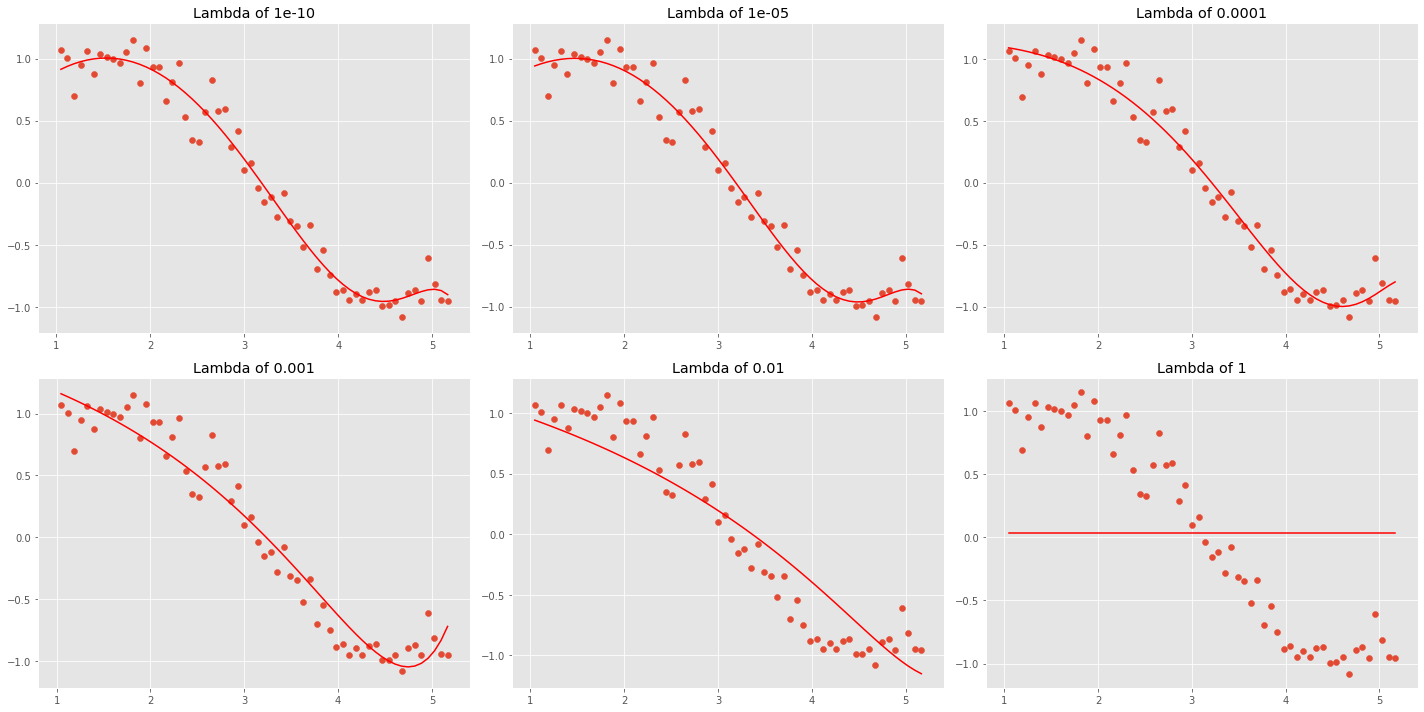

In [29]:
plt.figure(figsize=(20, 10))
models_to_plot = {1e-10:231, 1e-5:232, 1e-4:233, 1e-3:234, 1e-2:235, 1:236}
for i in range(len(lambda_elasticnet)):
    coef_matrix_elasticnet.iloc[i,] = elasticnet_regression(data, features, lambda_elasticnet[i], models_to_plot)

In [30]:
coef_matrix_elasticnet

,LSE,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
lambda_1e-15,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,2.9e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
lambda_1e-10,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,2.9e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
lambda_1e-08,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,2.9e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
lambda_1e-05,0.97,0.34,0.84,-0.22,-0.029,-0.0012,0.0002,8.9e-05,1.9e-05,3.1e-06,4.4e-07,5e-08,2.9e-09,0,-2.9e-10,-9.8e-11,-2.5e-11
lambda_0.0001,1.2,1.1,0.057,-0.057,-0.015,-0.0023,-0.00014,0,7.5e-06,2.9e-06,6e-07,8.9e-08,8e-09,0,-0,-5.7e-11,-2.9e-11
lambda_0.001,1.8,1.4,-0.22,-0.042,-0.0064,-0.00069,-1.2e-05,-0,0,0,5.9e-08,2e-08,4.5e-09,8.6e-10,1.4e-10,1.7e-11,1e-12
lambda_0.01,4.3,1.2,-0.21,-0.027,-0.0035,-0.00035,-5.4e-06,-0,-0,0,0,0,0,0,7.1e-12,7.8e-12,2.6e-12
lambda_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
lambda_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
lambda_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


# ARIMA

Get data from DataMarket:

https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line

In [31]:
!wget https://raw.githubusercontent.com/gmonaci/ARIMA/master/international-airline-passengers.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [32]:
# Load the data
data = pd.read_csv('international-airline-passengers.csv', engine='python', skipfooter=3)

data['Month']=pd.to_datetime(data['Month'], format='%Y-%m-%d')
data.set_index(['Month'], inplace=True)
data.columns = ["Passengers"]

FileNotFoundError: [Errno 2] No such file or directory: 'international-airline-passengers.csv'

In [ ]:
# Plot the data
data.plot()
plt.ylabel('Monthly airline passengers (x1000)')
plt.xlabel('Date')
plt.show()

train_data = data['1949-01-01':'1959-12-01']
test_data = data['1960-01-01':'1960-12-01']

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.values)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data.values, lags=5)

In [ ]:
import statsmodels.api as sm